# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Infinite Cylinder with Oblique Incidence
***

Referring to Section 7.4.1.3, studies the scattering from infinite length cylinders with oblique incidence, as shown in Figure 7.8.  
The two-dimensional bistatic radar cross section for the TMz polarization is given by (Equation 7.28)

$$
    \sigma_{2D} = \frac{2\lambda}{\pi\sin\theta_i}\Bigg| \sum\limits_{n=0}^{\infty} \epsilon_n\frac{J_n(ka\sin\theta_i)}{H_n^{(2)}(ka\sin\theta_i)} \cos(n\, \phi_o)\Bigg|^2 \hspace{0.5in} \text{(m)},
$$

The two-dimensional bistatic radar cross section for the TEz polarization is given by (Equation 7.30)

$$
    \sigma_{2D} = \frac{2\lambda}{\pi\sin\theta_i}\Bigg| \sum\limits_{n=0}^{\infty} \epsilon_n\frac{J_n^\prime(ka\sin\theta_i)}{H_n^{(2)\prime}(ka\sin\theta_i)} \cos(n\, \phi_o)\Bigg|^2 \hspace{0.5in} \text{(m)}.
$$

As in the case of normal incidence, an approximation of the three-dimensional radar cross section from the two-dimensional radar cross section is (Equations 7.31 and 7.32)

\begin{align}
    \sigma_{TM} \approx \frac{4L^2}{\pi}\frac{\sin^2\theta_o}{\sin\theta_i}\, &\Bigg| \sum\limits_{n=0}^{\infty} \epsilon_n\frac{J_n(ka\sin\theta_i)}{H_n^{(2)}(ka\sin\theta_i)} \cos(n\, \phi_o)\Bigg|^2 \nonumber \\ \nonumber \\ &\times \Bigg[ \frac{\sin\big(0.5kL(\cos\theta_i + \cos\theta_o)\big)}{0.5kL(\cos\theta_i + \cos\theta_o)} \Bigg]^2\hspace{0.5in} \text{(m}^2\text{)},
\end{align}

and

\begin{align}
    \sigma_{TE} \approx \frac{4L^2}{\pi}\sin\theta_i\, &\Bigg| \sum\limits_{n=0}^{\infty} \epsilon_n\frac{J_n^\prime(ka\sin\theta_i)}{H_n^{(2)\prime}(ka\sin\theta_i)} \cos(n\, \phi_o)\Bigg|^2 \nonumber \\ \nonumber \\ &\times \Bigg[ \frac{\sin\big(0.5kL(\cos\theta_i + \cos\theta_o)\big)}{0.5kL(\cos\theta_i + \cos\theta_o)} \Bigg]^2\hspace{0.5in} \text{(m}^2\text{)}.
\end{align}
***

Begin by getting the library path

In [1]:
import lib_path

Set the operating frequency (Hz), the radius (m), the length (for 3D RCS) (m), the number of modes and the incident angle (from the z-axis) (degrees)

In [2]:
frequency = 10e9

radius = 0.5

length = 20.0

number_of_modes = 30

incident_angle = 20.0

Select either 2D or 3D RCS

In [3]:
mode = '2D'

Set the observation angles with the `linspace` routine from `scipy`

In [4]:
from numpy import linspace

observation_angle = linspace(-90, 90, 1801)

Calculate the radar cross section based on the mode

In [5]:
from Libs.rcs.infinite_cylinder_oblique import radar_cross_section, radar_cross_section_3d


if mode == '2D':

    rcs_te, rcs_tm = radar_cross_section(frequency, radius, incident_angle, observation_angle, number_of_modes)

else:

    rcs_te, rcs_tm = radar_cross_section_3d(frequency, radius, incident_angle, observation_angle, number_of_modes, length)

Display the RCS for the infinite cylinder using the `matplotlib` routines

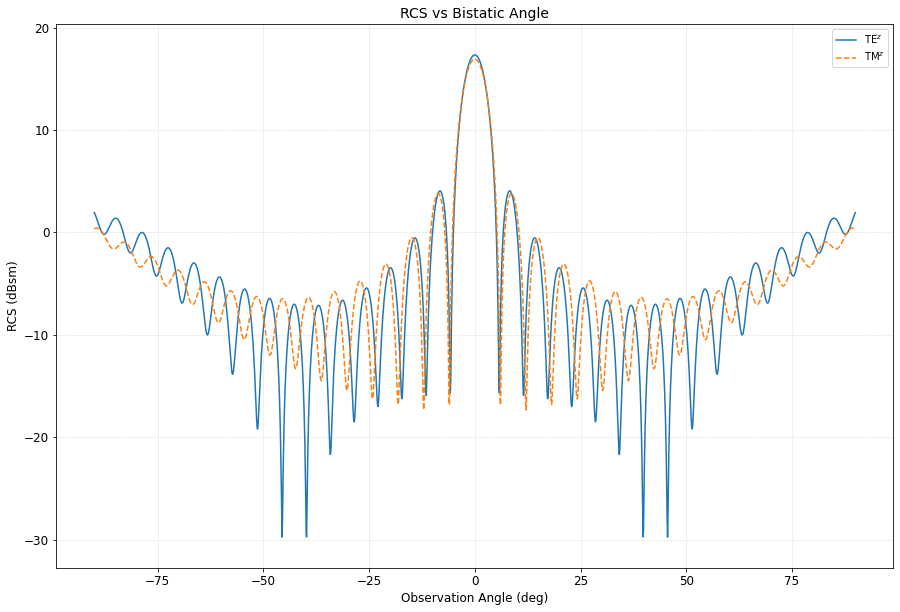

In [6]:
from matplotlib import pyplot as plt

from numpy import log10, degrees


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Display the results

plt.plot(observation_angle, 10.0 * log10(rcs_te), '', label='TE$^z$')

plt.plot(observation_angle, 10.0 * log10(rcs_tm), '--', label='TM$^z$')



# Set the plot title and labels

plt.title('RCS vs Bistatic Angle', size=14)

plt.ylabel('RCS (dBsm)', size=12)

plt.xlabel('Observation Angle (deg)', size=12)

plt.ylim(min(10.0 * log10(rcs_te)) - 3, max(10.0 * log10(rcs_te)) + 3)



# Set the tick label size

plt.tick_params(labelsize=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)


# Set the legend

plt.legend(loc='upper right', prop={'size': 10})